In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from math import sqrt

In [25]:
def exp(tau):
    return -tau*np.log(1-np.random.uniform())

In [26]:
def pdf(N,t0):
    return np.array([exp(t0) for i in range(N)])

(array([629., 234.,  87.,  29.,  15.,   4.,   0.,   1.,   0.,   1.]),
 array([2.54729606e-03, 4.79164226e+00, 9.58073722e+00, 1.43698322e+01,
        1.91589271e+01, 2.39480221e+01, 2.87371171e+01, 3.35262120e+01,
        3.83153070e+01, 4.31044019e+01, 4.78934969e+01]),
 <BarContainer object of 10 artists>)

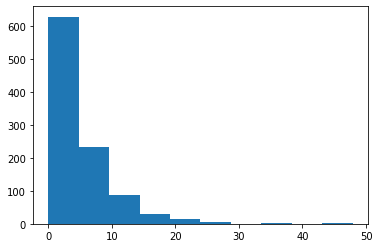

In [27]:
N = 1000
t0 = 5
dat = pdf(N,t0)
plt.hist(dat)

In [28]:
def likelihood(dati,t):
    
    return np.prod([np.exp(-i/t)/t for i in dati])

In [40]:
dati = pdf(150,5)

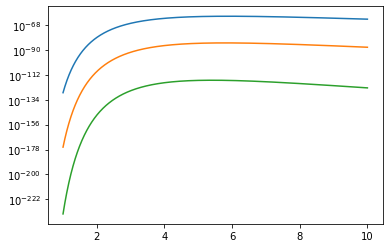

In [58]:
#Likelihood

dat1 = dati[:50]
dat2 = dati[:70]
dat3 = dati[:100]

rang = np.linspace(1,10,1000)

like1 = [likelihood(dat1,t) for t in rang]
like2 = [likelihood(dat2,t) for t in rang]
like3 = [likelihood(dat3,t) for t in rang]

plt.plot(rang,like1)
plt.plot(rang,like2)
plt.plot(rang,like3)

plt.yscale('log')

# plt.plot(rang,np.log(like))

In [31]:
def logLikelihood(dati,t):
    
    return np.sum([np.log(np.exp(-i/t)/t) for i in dati])

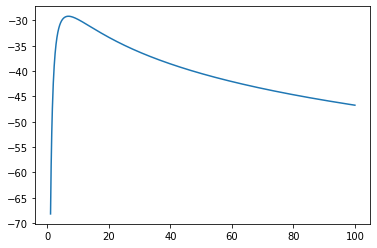

In [32]:
logLike = [logLikelihood(dati,t) for t in rang]

plt.plot(rang,logLike)

In [33]:
r =1

def minimum(func,xmin,xmax,precision=.0001, x2=None,x3=None):
    
    if(sqrt((xmax-xmin)**2) < precision):
        return xmin
    
    if (x2 != None):
        x2 = x2
        x3 = xmin + (1-r)*(xmax-xmin)

    elif x3 != None:
        x2 = xmin +     r*(xmax-xmin)
        x3 = x3
    else:
        x2 = xmin +     r*(xmax-xmin)
        x3 = xmin + (1-r)*(xmax-xmin)
    
    if(func(x3) > func(x2)):
        return minimum(func,x3,xmax,precision,x3=x2)
    else:
        return minimum(func,xmin,x2,precision,x2=x3)

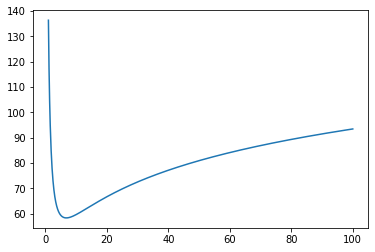

In [34]:
rang = np.linspace(1,100,1000)

l = [-2*logLikelihood(dati,t) for t in rang]

plt.plot(rang,l)
